In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [182]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [183]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 

query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="


In [184]:
city_data=[]
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat=response['coord']['lat']
        lon=response['coord']['lon']
        temp=response['main']['temp']
        humidity=response['main']['humidity']
        wind=response['wind']['speed']
        clouds=response['clouds']['all']
        city_name=response['name']
#         city_id=response['id']
        temp_max=response['main']['temp_max']
        country =response['sys']['country']
        date = response['dt']
        city_data.append({"City": city_name,
                          "Lat": lat,
                          "Lng": lon,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Max Temp": temp_max,
                          "Date": date}
                        )
        print(f"The city is: {city_name}")
#         print(f"The city id is: {city_id}")
    except:
        print(f"The city is missing data. City skipped.")


print("---------------------------------------")
print("Processing Complete")

The city is: Jamestown
The city is missing data. City skipped.
The city is: Mataura
The city is: Shwebo
The city is: Hithadhoo
The city is missing data. City skipped.
The city is: Aviles
The city is: Albany
The city is: Bredasdorp
The city is: Norman Wells
The city is: Zamania
The city is: Kattivakkam
The city is: Cruz das Almas
The city is: Cartagena
The city is: Mar del Plata
The city is: Hasaki
The city is: Castro
The city is: Kalmunai
The city is: Kapaa
The city is: Busselton
The city is missing data. City skipped.
The city is: Rikitea
The city is: Saint Stephen
The city is: Saskylakh
The city is: Chumikan
The city is: Chillicothe
The city is missing data. City skipped.
The city is: Atuona
The city is: Semiletka
The city is: Kokoda
The city is: Araouane
The city is: Clinton
The city is: Srono
The city is: Svetlaya
The city is: Vaini
The city is: Buala
The city is: Bambous Virieux
The city is: Bamiantong
The city is: Dikson
The city is: Hilo
The city is: Sept-Iles
The city is: Ushua

In [185]:
# Export the city data into a .csv.
# Display the DataFrame

weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Max Temp": temp_max,
    "Lat": lat,
    "Lng": lon,
    "Humidity": humidity
}
weather_data = pd.DataFrame(city_data)
weather_data.head()

# weather_data.to_csv('Weather CSV/weather_data.csv')

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Max Temp,Date
0,Jamestown,42.10,-79.24,92,90,14.99,US,33.01,1580099800
1,Mataura,-46.19,168.86,70,88,5.99,NZ,64.00,1580099822
2,Shwebo,22.57,95.70,30,0,4.52,MM,75.52,1580100006
3,Hithadhoo,-0.60,73.08,80,79,11.61,MV,82.22,1580099798
4,Aviles,43.55,-5.92,71,75,1.12,ES,55.99,1580100006


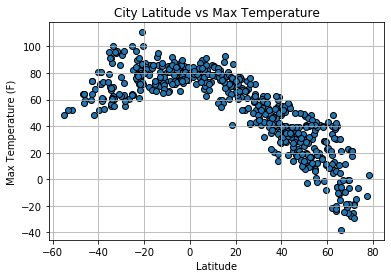

In [186]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, edgecolor='k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.savefig("City_Latitude_vs_Max_Temperature.png")
plt.show()

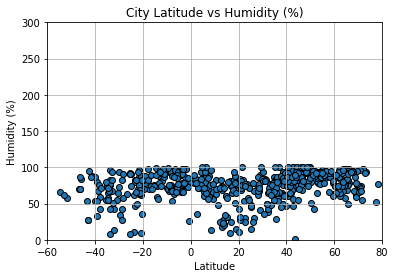

In [187]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, edgecolor='k')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.axis((-60,80,0,300))
plt.grid()
plt.title("City Latitude vs Humidity (%)")
plt.savefig("City_Latitude_vs_Humidity.png")
plt.show()

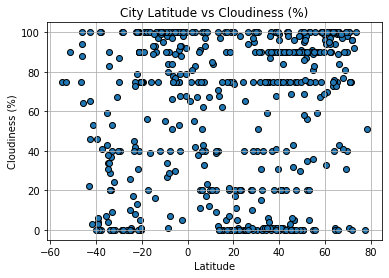

In [188]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='k')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title("City Latitude vs Cloudiness (%)")
plt.savefig("City_Latitude_vs_Cloudiness.png")
plt.show()

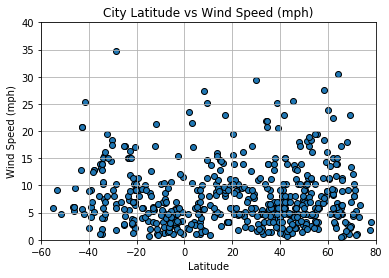

In [189]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.axis((-60,80,0,40))
plt.grid()
plt.title("City Latitude vs Wind Speed (mph)")
plt.savefig("City_Latitude_vs_Wind_Speed.png")
plt.show()

y = -1.29x +91.41
The r-squared is: -0.8846765189053757


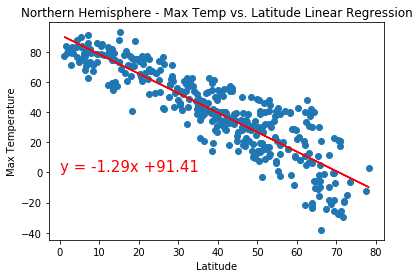

In [190]:
north_hem = pd.DataFrame(weather_data)
north_hem = north_hem[north_hem['Lat'] >= 0]
# north_hem.head()

x_values = north_hem['Lat']
y_values = north_hem['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Northern_Hem_Max_Temperature_vs_Latitude.png")
plt.show()

y = 0.36x +83.34
The r-squared is: 0.41020401446930116


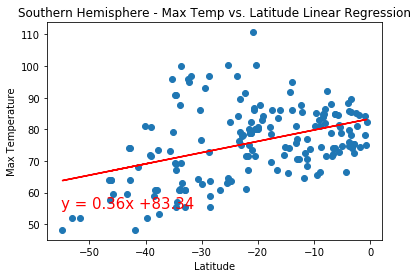

In [191]:
south_hem = pd.DataFrame(weather_data)
south_hem = south_hem[south_hem['Lat'] < 0]
# south_hem.head()

x_values = south_hem['Lat']
y_values = south_hem['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Southern_Hem_Max_Temperature_vs_Latitude.png")
plt.show()

In [ ]:
# In the Northern Hemisphere graphic, the regression line is negative, indicating a weak/negative correlation between higher latitudes and maximum temperatures. In the Southern Hemisphere, we see a positive correlation between increasing max temperatures with increasing latitudes (positive correlation). 

y = 0.36x +61.06
The r-squared is: 0.3515747313312827


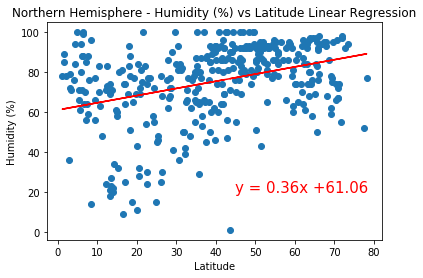

In [192]:
north_hem = pd.DataFrame(weather_data)
north_hem = north_hem[north_hem['Lat'] >= 0]
# north_hem.head()

x_values = north_hem['Lat']
y_values = north_hem['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Northern_Hem_Humidity(%)_vs_Latitude.png")
plt.show()

y = 0.48x +83.31
The r-squared is: 0.3280215886648377


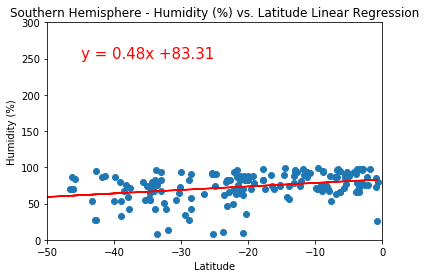

In [193]:
south_hem = pd.DataFrame(weather_data)
south_hem = south_hem[south_hem['Lat'] < 0]
# south_hem.head()

x_values = south_hem['Lat']
y_values = south_hem['Humidity'] 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,250),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.axis((-50,0,0,300))

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Southern_Hem_Humidity(%)_vs_Latitude.png")
plt.show()

In [ ]:
# For the Northern Hem, the graph indicates a positive correlation between higher latitudes and high levels of humidity; the higher the latitude, the higher the humidity. The Southern Hem only experiences a slight fluctuation in levels of humidity with increasing latitudes. 

y = 0.59x +35.74
The r-squared is: 0.29440947618090263


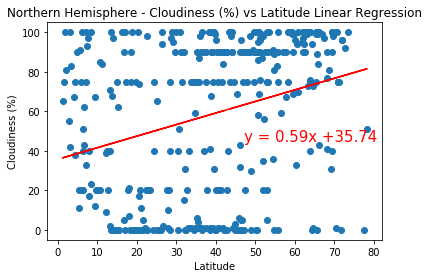

In [194]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

north_hem = pd.DataFrame(weather_data)
north_hem = north_hem[north_hem['Lat'] >= 0]
# north_hem.head()

x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47,45),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Northern_Hem_Cloudiness(%)_vs_Latitude.png")
plt.show()

y = 0.99x +80.51
The r-squared is: 0.35681995954789697


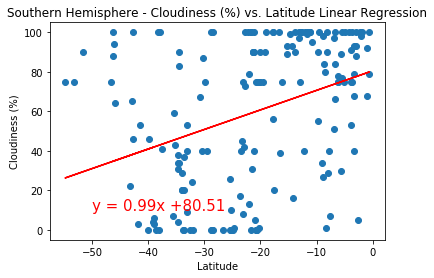

In [195]:
south_hem = pd.DataFrame(weather_data)
south_hem = south_hem[south_hem['Lat'] < 0]
# south_hem.head()

x_values = south_hem['Lat']
y_values = south_hem['Cloudiness'] 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Southern_Hem_Cloudiness_vs_Latitude.png")
plt.show()

In [ ]:
# In the Northern Hem, there appears to be a higher percentage of cloudiness at latitudes between 10 and 70, but a latitude of 40 to 70 will have a greater percentage of cloud cover. The Southern Hem does not have as much cloudiness, but the highest concetration of cloud appears at the highest latitudes. There is little to no cloud cover at low latitudes in the S.H. 

y = -0.0x +8.12
The r-squared is: -0.0092649569433374


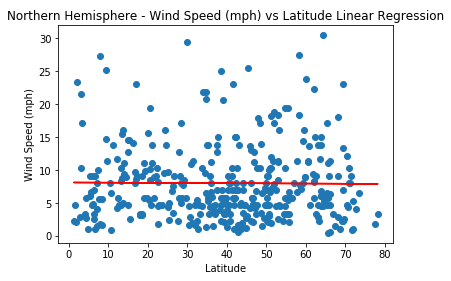

In [196]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

north_hem = pd.DataFrame(weather_data)
north_hem = north_hem[north_hem['Lat'] >= 0]
# north_hem.head()

x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,33),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Northern_Hem_Wind_Speed(mph)_vs_Latitude.png")
plt.show()

y = -0.13x +4.9
The r-squared is: -0.3296669238598325


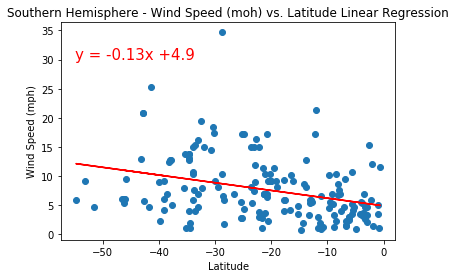

In [197]:
south_hem = pd.DataFrame(weather_data)
south_hem = south_hem[south_hem['Lat'] < 0]
# south_hem.head()

x_values = south_hem['Lat']
y_values = south_hem['Wind Speed'] 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (moh) vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Southern_Hem_Wind_Speed(mph)_vs_Latitude.png")
plt.show()

In [ ]:
# The linear regression in the N.H. is fairly constant, meaning a strong relationship between latitude and wind speed is hardly present. In the S.H., we see a negative correlation between low latitudes and high wind speeds.